In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=True)
df.sample(5)

,value
date,
2016-07-24,19733
2019-05-23,86054
2017-10-13,50295
2019-06-28,87190
2017-11-21,56693


In [3]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.sample(5)

,value
date,
2019-07-31,99008
2017-05-05,32642
2018-06-12,72167
2018-08-04,46947
2017-12-09,41348


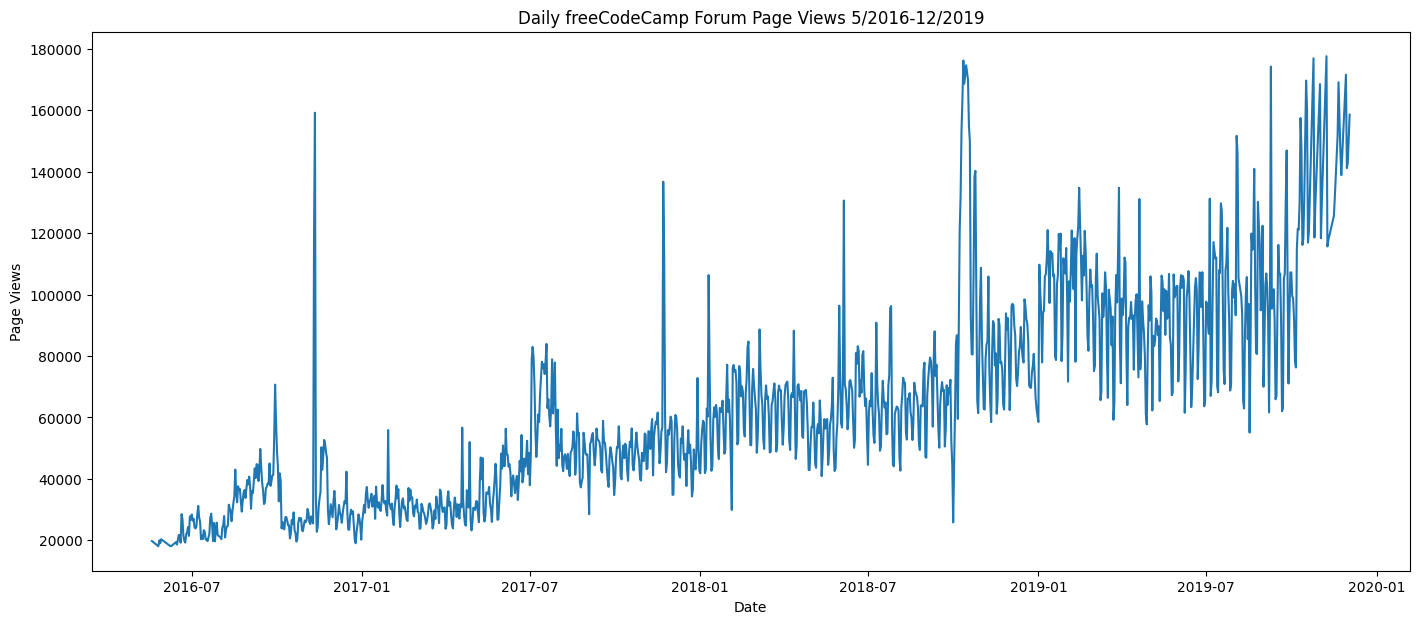

In [4]:
# Draw a line chart
fig = plt.figure(figsize=(17,7))
plt.plot(df['value'])
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.show()

In [27]:
# Draw a bar chart
df.sample(5)
x = df.groupby(by=[pd.DatetimeIndex(df.index).year, pd.DatetimeIndex(df.index).month])['value'].mean()
x.index.set_names(names=['year', 'month'], inplace=True)
x
#y = x.to_frame()
#y.index
#sns.barplot(x)
z = x.unstack(level=0)
z
#sns.barplot(z)

year,2016,2017,2018,2019
month,,,,
1,NaN,32785.161290,58580.096774,102056.516129
2,NaN,31113.071429,65679.000000,105968.357143
3,NaN,29369.096774,62693.774194,91214.483871
4,NaN,30878.733333,62350.833333,89368.433333
5,19432.400000,34244.290323,56562.870968,91439.903226
6,21875.105263,43577.500000,70117.000000,90435.642857
7,24109.678571,65806.838710,63591.064516,97236.566667
8,31049.193548,47712.451613,62831.612903,102717.310345
9,41476.866667,47376.800000,65941.733333,97268.833333


In [ ]:
# https://stackoverflow.com/questions/68738800/how-to-create-a-yearly-bar-plot-grouped-by-months